In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Gt\\globalterrorism.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
df.dropna(axis=1,inplace=True)
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [5]:
df.shape

(181691, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,...,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,...,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#drop eventid
#has outliers -- country

In [9]:
df.drop('eventid',axis=1,inplace=True)

<Axes: ylabel='country'>

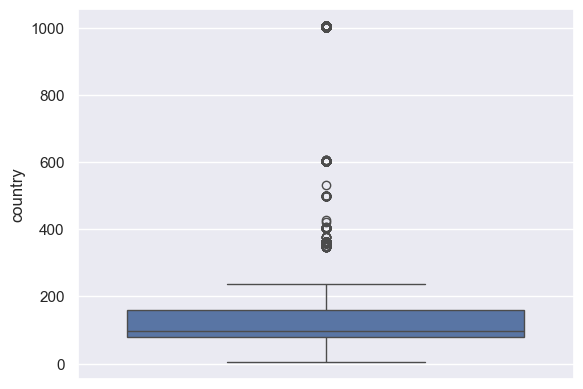

In [10]:
sns.boxplot(df['country'])

In [11]:
x=df[df['country']>300]
print(x)

        iyear  imonth  iday  extended  country         country_txt  region  \
15       1970       1    10         0      499  East Germany (GDR)       9   
34       1970       1    28         0      499  East Germany (GDR)       9   
59       1970       2    10         0      362  West Germany (FRG)       8   
62       1970       2    13         0      362  West Germany (FRG)       8   
79       1970       2    21         0      362  West Germany (FRG)       8   
...       ...     ...   ...       ...      ...                 ...     ...   
181488   2017      12    23         0      603      United Kingdom       8   
181515   2017      12    24         0     1004         South Sudan      11   
181535   2017      12    25         0      603      United Kingdom       8   
181556   2017      12    26         0      603      United Kingdom       8   
181664   2017      12    30         0      603      United Kingdom       8   

                region_txt  vicinity  crit1  ...  \
15         

In [12]:
df.drop(x.index,axis=0,inplace=True)

In [13]:
df.shape

(175198, 28)

In [14]:
df.head()

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [15]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'individual', 'weaptype1', 'weaptype1_txt',
       'property', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [16]:
df=df.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'})

In [17]:
y=df[(df['month']==0) | (df['day']==0) | (df['year']==0)]
df.drop(y.index,axis=0,inplace=True)

In [18]:
df.head()

,year,month,day,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
5,1970,1,1,0,217,United States,1,North America,0,1,...,Black Nationalists,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9
6,1970,1,2,0,218,Uruguay,3,South America,0,1,...,Tupamaros (Uruguay),0,5,Firearms,0,PGIS,0,0,0,0
7,1970,1,2,0,217,United States,1,North America,0,1,...,Unknown,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9
8,1970,1,2,0,217,United States,1,North America,0,1,...,New Year's Gang,0,8,Incendiary,1,Hewitt Project,0,0,0,0


In [19]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,month,day,extended,country,country_txt,region,region_txt,vicinity,crit1,...,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,0,13,Unknown,0,PGIS,0,0,0,0,1970-07-02
5,1970,1,1,0,217,United States,1,North America,0,1,...,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9,1970-01-01
6,1970,1,2,0,218,Uruguay,3,South America,0,1,...,0,5,Firearms,0,PGIS,0,0,0,0,1970-01-02
7,1970,1,2,0,217,United States,1,North America,0,1,...,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9,1970-01-02
8,1970,1,2,0,217,United States,1,North America,0,1,...,0,8,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-02


In [20]:
df.drop(['year','month','day'],axis=1,inplace=True)
df.head()

,extended,country,country_txt,region,region_txt,vicinity,crit1,crit2,crit3,success,...,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,0,58,Dominican Republic,2,Central America & Caribbean,0,1,1,1,1,...,0,13,Unknown,0,PGIS,0,0,0,0,1970-07-02
5,0,217,United States,1,North America,0,1,1,1,1,...,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9,1970-01-01
6,0,218,Uruguay,3,South America,0,1,1,1,0,...,0,5,Firearms,0,PGIS,0,0,0,0,1970-01-02
7,0,217,United States,1,North America,0,1,1,1,1,...,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9,1970-01-02
8,0,217,United States,1,North America,0,1,1,1,1,...,0,8,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-02


In [21]:
df['extended'].value_counts()

0    166276
1      8069
Name: extended, dtype: int64

In [22]:
df['country_txt'].value_counts()   #there is a column--country relevant to this,so drop it

Iraq                 24616
Pakistan             14331
Afghanistan          12718
India                11931
Colombia              8232
                     ...  
Vatican City             1
St. Lucia                1
North Korea              1
Falkland Islands         1
Wallis and Futuna        1
Name: country_txt, Length: 187, dtype: int64

In [23]:
df['region_txt'].value_counts()   #there is a column--region relevant to this,so drop it

Middle East & North Africa     50303
South Asia                     44866
South America                  18838
Sub-Saharan Africa             17093
Southeast Asia                 12427
Western Europe                 10705
Central America & Caribbean    10260
Eastern Europe                  4809
North America                   3416
East Asia                        790
Central Asia                     562
Australasia & Oceania            276
Name: region_txt, dtype: int64

In [24]:
df['vicinity'].value_counts()    #-9 are probably false values,so drop it

 0    161752
 1     12560
-9        33
Name: vicinity, dtype: int64

In [25]:
val=df[df['vicinity']==-9]
df.drop(val.index,axis=0,inplace=True)

In [26]:
df['crit1'].value_counts()

1    172300
0      2012
Name: crit1, dtype: int64

In [27]:
df['crit2'].value_counts()

1    173193
0      1119
Name: crit2, dtype: int64

In [28]:
df['crit3'].value_counts()

1    152734
0     21578
Name: crit3, dtype: int64

In [29]:
df['success'].value_counts()

1    155508
0     18804
Name: success, dtype: int64

In [30]:
df['suicide'].value_counts()

0    167691
1      6621
Name: suicide, dtype: int64

In [31]:
df['attacktype1_txt'].value_counts()    #there is a column--attacktype1 relevant to this,so drop it

Bombing/Explosion                      85316
Armed Assault                          41621
Assassination                          17431
Hostage Taking (Kidnapping)            10887
Facility/Infrastructure Attack          9431
Unknown                                 7076
Hostage Taking (Barricade Incident)      968
Unarmed Assault                          954
Hijacking                                628
Name: attacktype1_txt, dtype: int64

In [32]:
df['targtype1_txt'].value_counts()     #there is a column--targtype1 relevant to this,so drop it

Private Citizens & Property       41369
Military                          26862
Police                            23570
Government (General)              20683
Business                          19420
Transportation                     6588
Utilities                          5975
Unknown                            5720
Religious Figures/Institutions     4304
Educational Institution            4250
Government (Diplomatic)            3380
Journalists & Media                2877
Terrorists/Non-State Militia       2836
Violent Political Party            1848
Airports & Aircraft                1266
Telecommunication                   988
NGO                                 929
Tourists                            417
Maritime                            334
Food or Water Supply                312
Abortion Related                    250
Other                               134
Name: targtype1_txt, dtype: int64

In [33]:
df['gname'].value_counts()

Unknown                                             80816
Taliban                                              7469
Islamic State of Iraq and the Levant (ISIL)          5611
Shining Path (SL)                                    4532
Farabundo Marti National Liberation Front (FMLN)     3343
                                                    ...  
Central University students                             1
Harakat-i-Inqilahi-i-Islami                             1
Dnester region guerrilas                                1
Sabaot Tribe                                            1
Anti Kurdish Workers Party Iraq nationals               1
Name: gname, Length: 3417, dtype: int64

In [34]:
df['individual'].value_counts()

0    173816
1       496
Name: individual, dtype: int64

In [35]:
df['weaptype1_txt'].value_counts()    #there is a column--weaptype1 relevant to this,so drop it

Explosives                                                                     89332
Firearms                                                                       56002
Unknown                                                                        14613
Incendiary                                                                     10113
Melee                                                                           3504
Chemical                                                                         302
Sabotage Equipment                                                               137
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      127
Other                                                                            104
Fake Weapons                                                                      33
Biological                                                                        31
Radiological                                                     

In [36]:
df['property'].value_counts()     #-9 are probably false values,so drop it

 1    89629
 0    63513
-9    21170
Name: property, dtype: int64

In [37]:
val=df[df['property']==-9]
df.drop(val.index,axis=0,inplace=True)

In [38]:
df['dbsource'].value_counts()

START Primary Collection                    64234
PGIS                                        59917
ISVG                                        12766
CETIS                                       12077
Hewitt Project                                906
UMD Schmid 2012                               851
UMD Algeria 2010-2012                         600
UMD South Africa                              449
UMD Sri Lanka 2011                            298
UMD Miscellaneous                             202
Anti-Abortion Project 2010                    179
Eco Project 2010                              143
UMD JTMM Nepal 2012                           102
HSI                                            97
Hyland                                         61
Hijacking DB                                   51
CAIN                                           41
CBRN Global Chronology                         40
Armenian Website                               36
UMD Encyclopedia of World Terrorism 2012       32


In [39]:
df['INT_LOG'].value_counts()     #-9 are probably false values,so drop it

-9    77955
 0    69515
 1     5672
Name: INT_LOG, dtype: int64

In [40]:
val=df[df['INT_LOG']==-9]
df.drop(val.index,axis=0,inplace=True)

In [41]:
df['INT_IDEO'].value_counts()      #-9 are probably false values,so drop it

 0    56204
 1    18864
-9      119
Name: INT_IDEO, dtype: int64

In [42]:
val=df[df['INT_IDEO']==-9]
df.drop(val.index,axis=0,inplace=True)

In [43]:
df['INT_MISC'].value_counts()      #-9 are probably false values,so drop it

 0    68091
 1     6963
-9       14
Name: INT_MISC, dtype: int64

In [44]:
val=df[df['INT_MISC']==-9]
df.drop(val.index,axis=0,inplace=True)

In [45]:
df['INT_ANY'].value_counts()      

0    54241
1    20813
Name: INT_ANY, dtype: int64

In [47]:
cols=['country','region','attacktype1','targtype1','weaptype1']
df.drop(cols,axis=1,inplace=True)
df.head()

,extended,country_txt,region_txt,vicinity,crit1,crit2,crit3,success,suicide,attacktype1_txt,...,gname,individual,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,0,Dominican Republic,Central America & Caribbean,0,1,1,1,1,0,Assassination,...,MANO-D,0,Unknown,0,PGIS,0,0,0,0,1970-07-02
6,0,Uruguay,South America,0,1,1,1,0,0,Assassination,...,Tupamaros (Uruguay),0,Firearms,0,PGIS,0,0,0,0,1970-01-02
8,0,United States,North America,0,1,1,1,1,0,Facility/Infrastructure Attack,...,New Year's Gang,0,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-02
9,0,United States,North America,0,1,1,1,1,0,Facility/Infrastructure Attack,...,New Year's Gang,0,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-03
10,0,United States,North America,0,1,1,0,0,0,Bombing/Explosion,...,"Weather Underground, Weathermen",0,Explosives,0,PGIS,0,0,0,0,1970-01-01


In [48]:
df.shape

(75054, 21)

In [50]:
df['extended'].value_counts()

0    70262
1     4792
Name: extended, dtype: int64

<Axes: xlabel='extended', ylabel='count'>

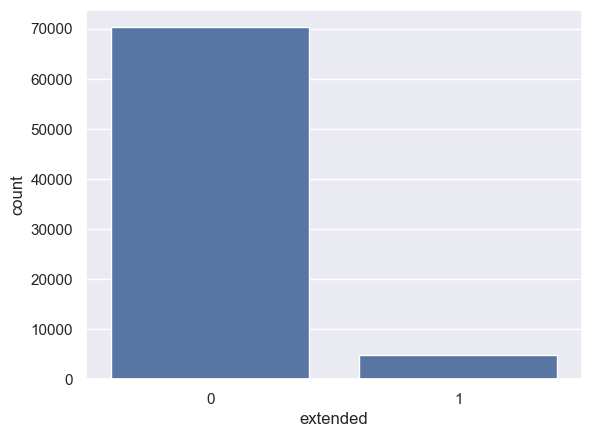

In [49]:
sns.countplot(x='extended',data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Colombia'),
  Text(2, 0, 'Peru'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Iraq'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'El Salvador'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Spain')])

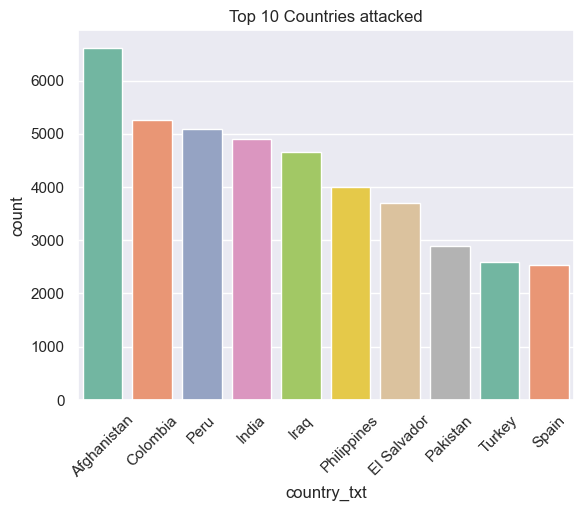

In [58]:
country_counts=df['country_txt'].value_counts()
top_10_countries = country_counts.nlargest(10).index
filtered_df = df[df['country_txt'].isin(top_10_countries)]
sns.countplot(x='country_txt', data=filtered_df, order=top_10_countries,palette='Set2')
plt.title("Top 10 Countries attacked")
plt.xticks(rotation=45)

In [60]:
reg=df['region_txt'].value_counts()

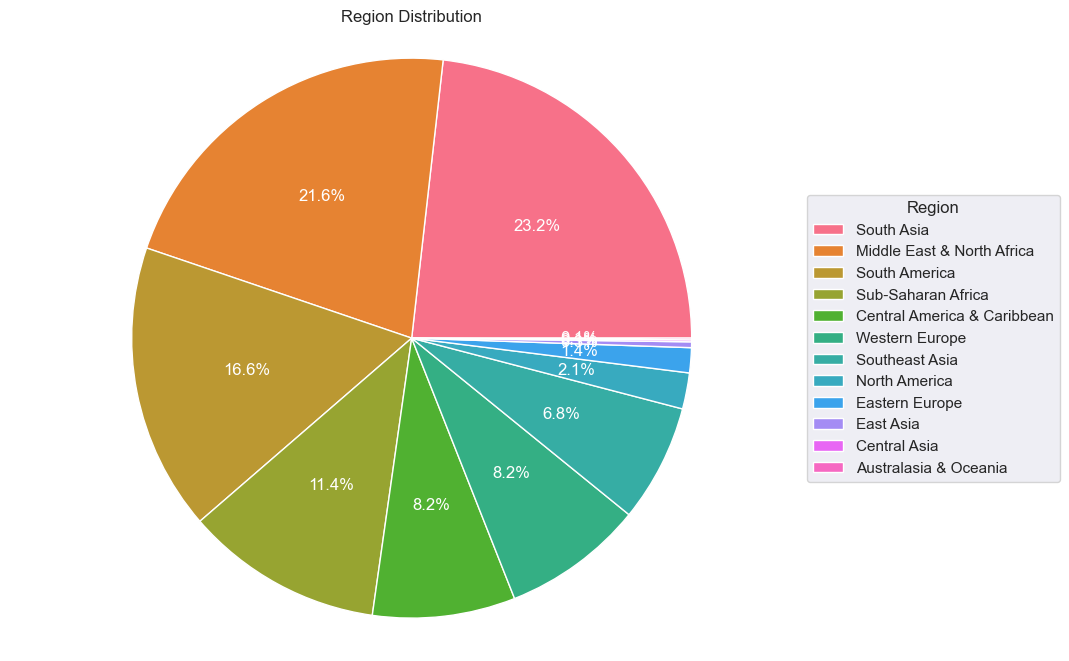

In [77]:
plt.figure(figsize=(10, 8))
wedges,texts,autotexts = plt.pie(reg,labels=reg.index,autopct='%1.1f%%',colors=sns.color_palette("husl", len(reg)),
    textprops=dict(color="w"))
plt.legend(wedges,reg.index,title="Region",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

<Axes: xlabel='vicinity', ylabel='count'>

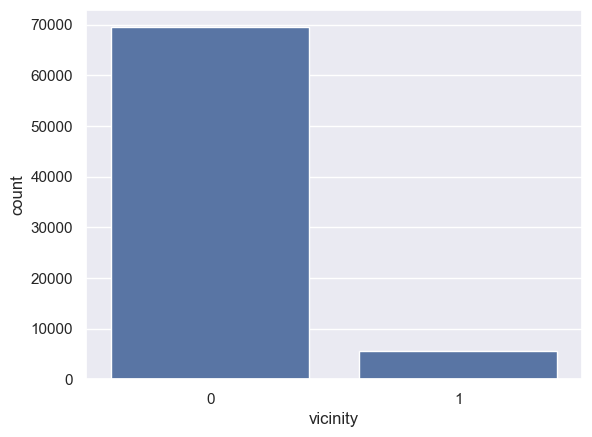

In [78]:
sns.countplot(x='vicinity',data=df)

In [80]:
c1=df['crit1'].value_counts()
x1,y1=c1.index,c1.values
c2=df['crit2'].value_counts()
x2,y2=c2.index,c2.values
c3=df['crit3'].value_counts()
x3,y3=c3.index,c3.values

In [84]:
x1

Int64Index([1, 0], dtype='int64')

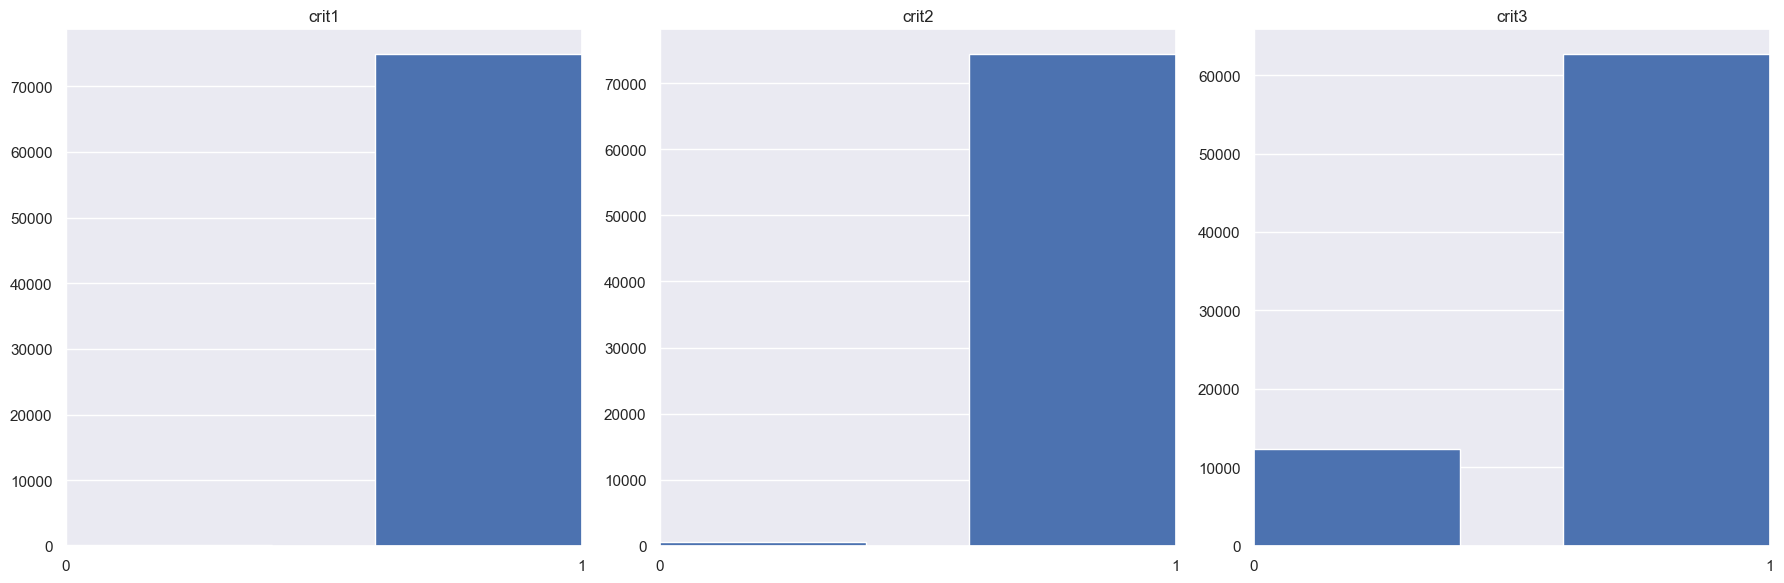

In [94]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,6))
scale=[0,1]
ax1.bar(x1,y1)
ax1.set_xlim(0,1)
ax1.set_xticks(scale)
ax1.set_title('crit1')

ax2.bar(x2,y2)
ax2.set_xlim(0,1)
ax2.set_xticks(scale)
ax2.set_title('crit2')

ax3.bar(x3,y3)
ax3.set_xlim(0,1)
ax3.set_xticks(scale)
ax3.set_title('crit3')

plt.tight_layout()

In [95]:
c4=df['success'].value_counts()
x4,y4=c4.index,c4.values
c5=df['suicide'].value_counts()
x5,y5=c5.index,c5.values
c6=df['individual'].value_counts()
x6,y6=c6.index,c6.values
c7=df['property'].value_counts()
x7,y7=c7.index,c7.values

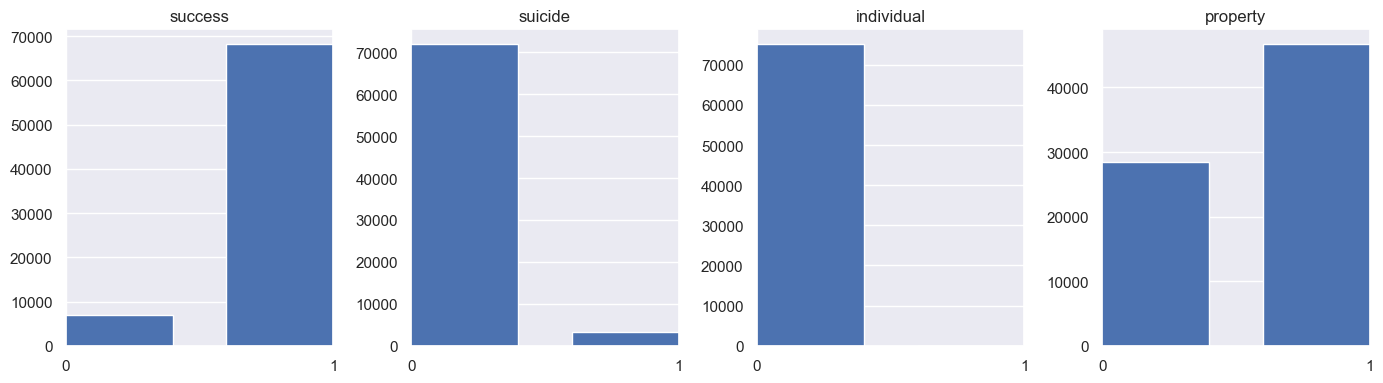

In [99]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(14,4))
scale=[0,1]
ax1.bar(x4,y4)
ax1.set_xlim(0,1)
ax1.set_xticks(scale)
ax1.set_title('success')

ax2.bar(x5,y5)
ax2.set_xlim(0,1)
ax2.set_xticks(scale)
ax2.set_title('suicide')

ax3.bar(x6,y6)
ax3.set_xlim(0,1)
ax3.set_xticks(scale)
ax3.set_title('individual')

ax4.bar(x7,y7)
ax4.set_xlim(0,1)
ax4.set_xticks(scale)
ax4.set_title('property')

plt.tight_layout()

In [101]:
attacks=df['attacktype1_txt'].value_counts()

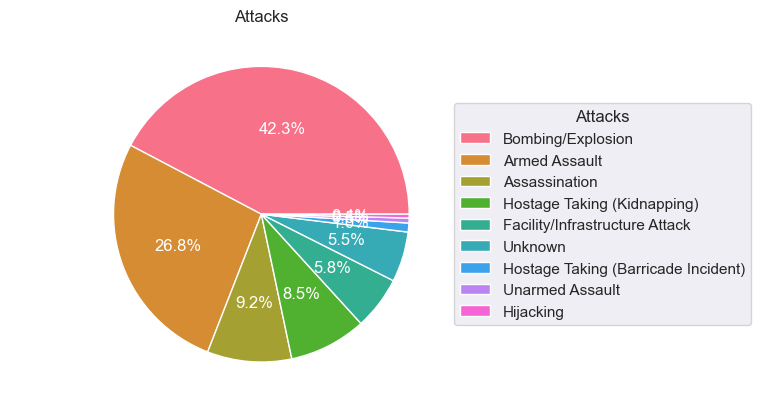

In [105]:
wedges,x,c=plt.pie(attacks,labels=attacks.index,autopct='%1.1f%%',colors=sns.color_palette('husl',len(attacks))
                  ,textprops=dict(color='w'))
plt.legend(wedges,attacks.index,title='Attacks',loc="center left",bbox_to_anchor=(1,0,0.5,1))
plt.title("Attacks")
plt.show()

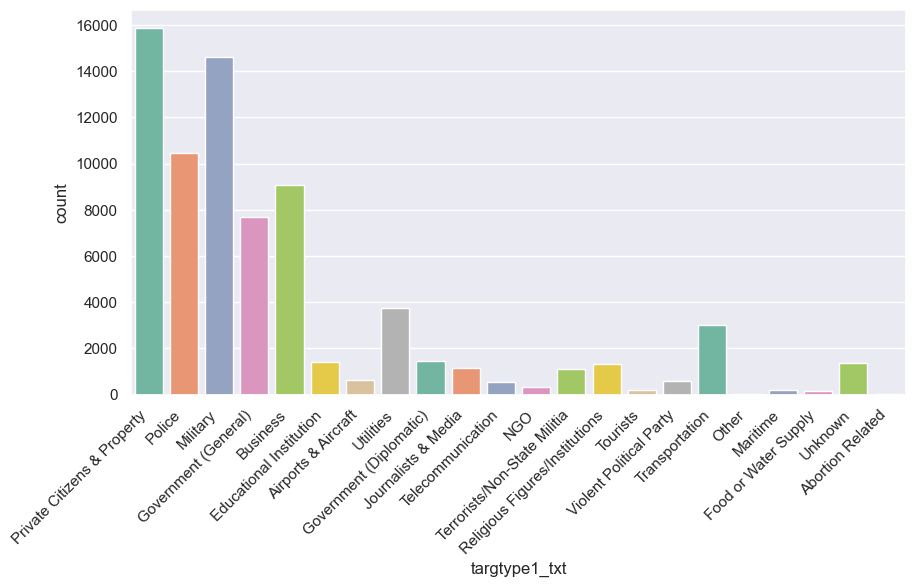

In [112]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['targtype1_txt'],data=df,palette='Set2')
plt.xticks(rotation=45,ha='right')
plt.show()

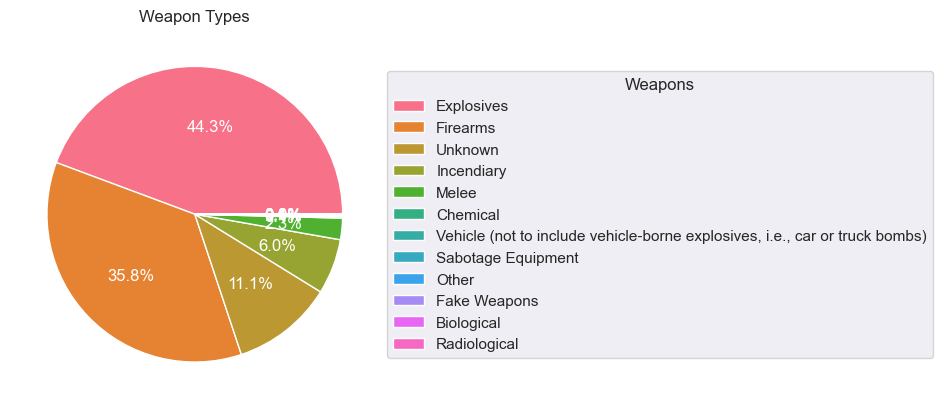

In [114]:
weap=df['weaptype1_txt'].value_counts()
wedges,x,c=plt.pie(weap,labels=weap.index,autopct='%1.1f%%',colors=sns.color_palette('husl',len(weap))
                  ,textprops=dict(color='w'))
plt.legend(wedges,weap.index,title='Weapons',loc="center left",bbox_to_anchor=(1,0,0.5,1))
plt.title("Weapon Types")
plt.show()

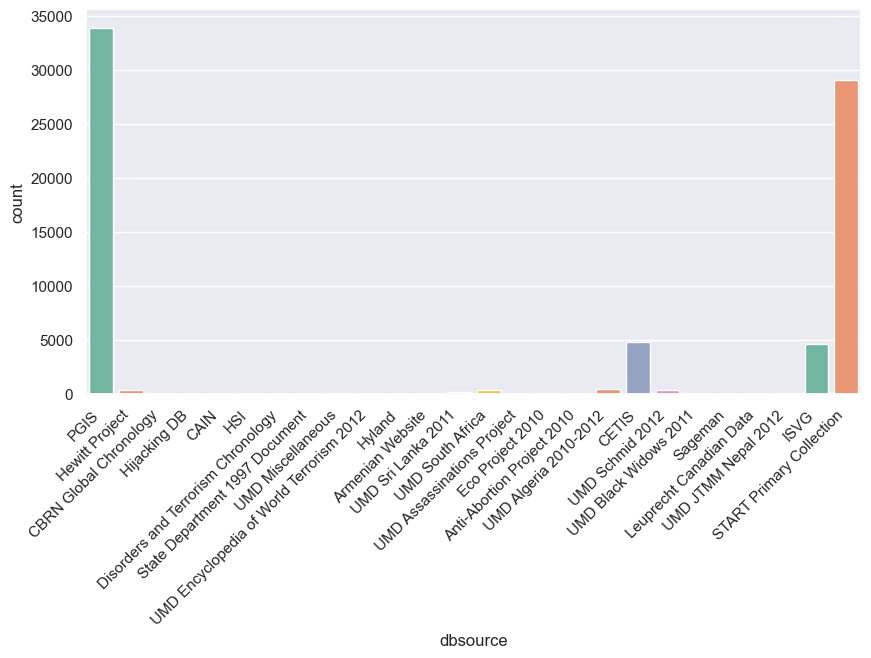

In [118]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['dbsource'],data=df,palette='Set2')
plt.xticks(rotation=45,ha='right')
plt.show()

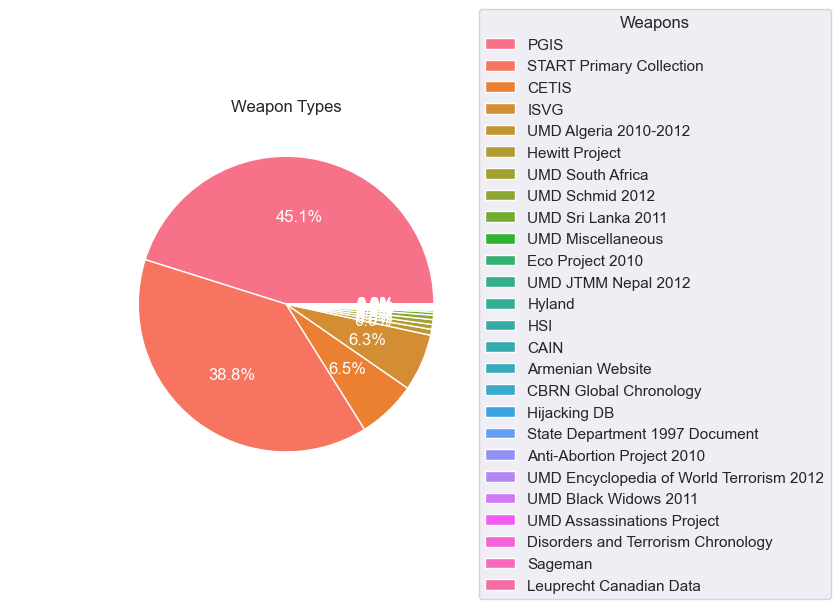

In [120]:
db=df['dbsource'].value_counts()
wedges,x,c=plt.pie(db,labels=db.index,autopct='%1.1f%%',colors=sns.color_palette('husl',len(db))
                  ,textprops=dict(color='w'))
plt.legend(wedges,db.index,title='Weapons',loc="center left",bbox_to_anchor=(1,0,0.5,1))
plt.title("Weapon Types")
plt.show()